## https://github.com/wzlxjtu/PositionalEncoding2D
## https://github.com/ankurhanda/nerf2D

In [1]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np

# Relative Positional encoding
- Relateive to the seq lentgh
- Used when fixed seq lenght (vision)

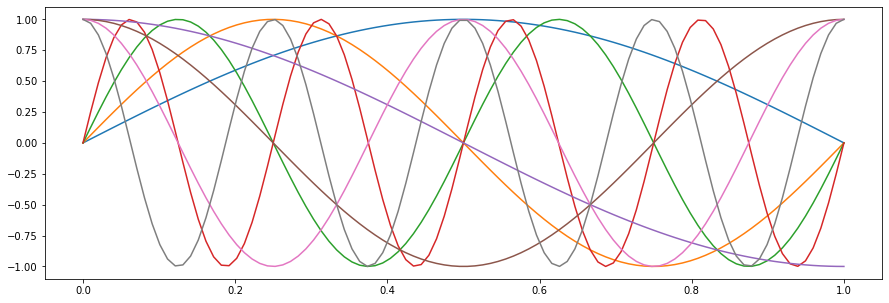

In [2]:
W,H=100,100
x_linspace = np.linspace(0, 1, W)
y_linspace = np.linspace(0, 1, H)

pe = np.column_stack([np.sin(1*math.pi*x_linspace),
                      np.sin(2*math.pi*x_linspace),
                      np.sin(4*math.pi*x_linspace),
                      np.sin(8*math.pi*x_linspace),
                      #np.sin(16*math.pi*x_linspace),
                      
                      np.cos(1*math.pi*x_linspace),
                      np.cos(2*math.pi*x_linspace),
                      np.cos(4*math.pi*x_linspace),
                      np.cos(8*math.pi*x_linspace),
                      #np.cos(4*math.pi*x_linspace),
                      #-np.cos(1*math.pi*x_linspace),
                      #-np.cos(2*math.pi*x_linspace),
                      #-np.cos(3*math.pi*x_linspace),
                      #-np.cos(4*math.pi*x_linspace)
])

plt.figure(figsize=(15, 5))
plt.plot(x_linspace, pe);

# Absolute Positional Encoding (used in transformers)
- Used whe variable seq lenght (**NLP**)

In [11]:
def positionalencoding1d(d_model, length):
    """
    :param d_model: dimension of the model
    :param length: length of positions
    :return: length*d_model position matrix
    """
    if d_model % 2 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with "
                         "odd dim (got dim={:d})".format(d_model))
    pe = torch.zeros(length, d_model)
    position = torch.arange(0, length).unsqueeze(1)
    div_term = torch.exp((torch.arange(0, d_model, 2, dtype=torch.float) *
                         -(math.log(10000.0) / d_model)))
    pe[:, 0::2] = torch.sin(position.float() * div_term)
    pe[:, 1::2] = torch.cos(position.float() * div_term)

    return pe


def positionalencoding2d(d_model, height, width):
    """
    :param d_model: dimension of the model
    :param height: height of the positions
    :param width: width of the positions
    :return: d_model*height*width position matrix
    """
    if d_model % 4 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with "
                         "odd dimension (got dim={:d})".format(d_model))
    pe = torch.zeros(d_model, height, width)
    # Each dimension use half of d_model
    d_model = int(d_model / 2)
    div_term = torch.exp(torch.arange(0., d_model, 2) *
                         -(math.log(10000.0) / d_model))
    pos_w = torch.arange(0., width).unsqueeze(1)
    pos_h = torch.arange(0., height).unsqueeze(1)
    pe[0:d_model:2, :, :] = torch.sin(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[1:d_model:2, :, :] = torch.cos(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[d_model::2, :, :] = torch.sin(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)
    pe[d_model + 1::2, :, :] = torch.cos(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)

    return pe

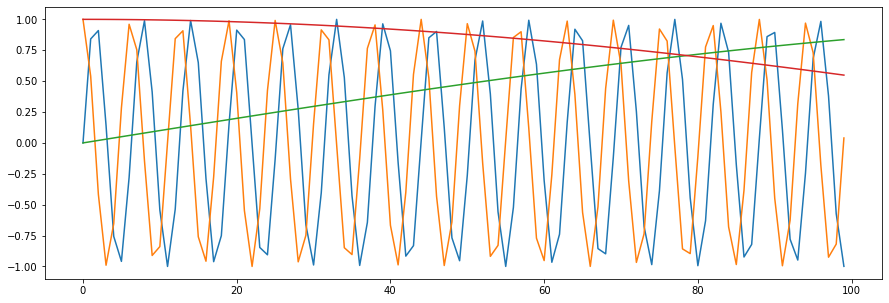

In [26]:
pe = positionalencoding1d(4, 100)

plt.figure(figsize=(15, 5))
plt.plot(np.arange(100), pe.data.numpy());

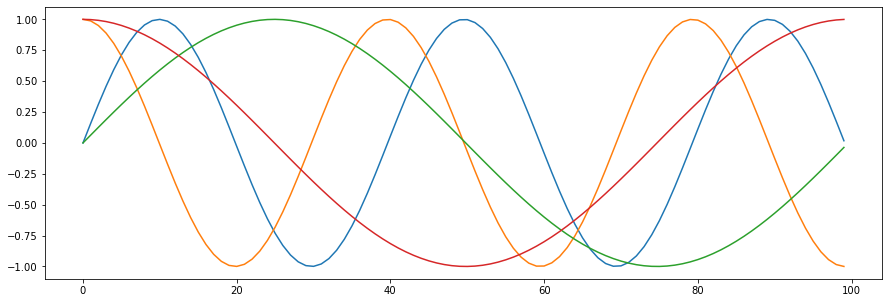

In [13]:
pe = positionalencoding1d(20, 100)

plt.figure(figsize=(15, 5))
plt.plot(np.arange(100), pe[:,4:8].data.numpy());

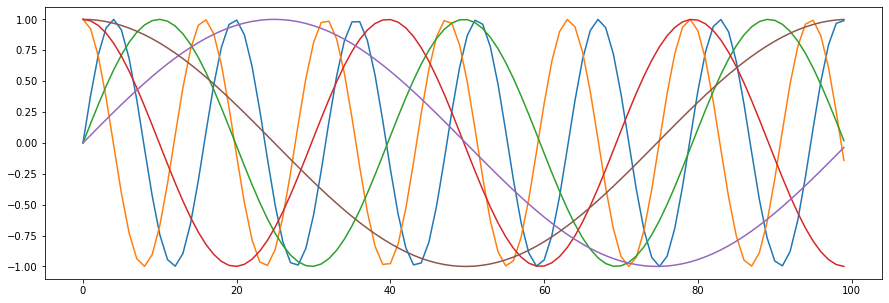

In [21]:
pe = positionalencoding1d(20, 100)

plt.figure(figsize=(15, 5))
plt.plot(np.arange(100), pe[:,2:8].data.numpy());

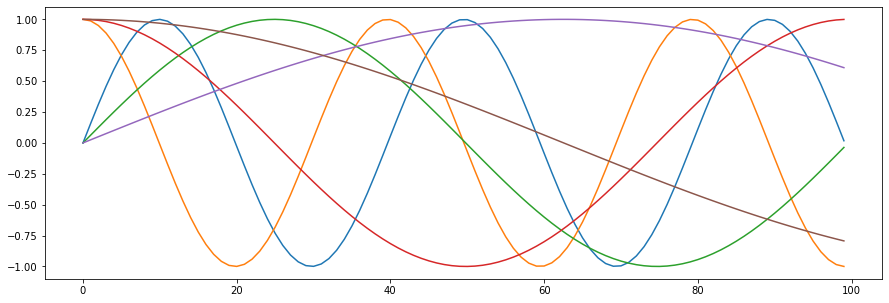

In [17]:
pe = positionalencoding1d(20, 100)

plt.figure(figsize=(15, 5))
plt.plot(np.arange(100), pe[:,4:10].data.numpy());

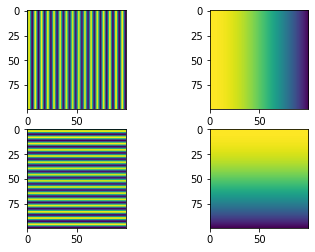

In [11]:

# 2D Visualization
# create a PE for 100*100 image, with model dimension 128.
pe2 = positionalencoding2d(128, 100, 100)
# show 4 different dimensions
plt.subplot(221)
plt.imshow(pe2[0,:,:])
plt.subplot(222)
plt.imshow(pe2[63,:,:])
plt.subplot(223)
plt.imshow(pe2[64,:,:])
plt.subplot(224)
plt.imshow(pe2[127,:,:])